In [1]:
## Use House_Price prediction dataset. Provide summary statistics (mean, median, minimum, maximum, standard deviation) of variables (categorical vs quantitative) such as- For example, if categorical variable is age groups and quantitative variable is income, then provide summary statistics of income grouped by the age groups.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r"C:\Users\KARAN\Downloads\DSML_PRACTICAL\DSML_PRACTICAL\Datasets\House Data.csv")

In [4]:
data.head()

,Unnamed: 0,district,price,address,AdUpdateDate,Category,GrossSquareMeters,BuildingAge,NumberFloorsofBuilding,UsingStatus,...,PriceStatus,RentalIncome,NumberOfBalconies,BalconyType,HallSquareMeters,WCSquareMeters,IsItVideoNavigable?,Subscription,BathroomSquareMeters,BalconySquareMeters
0,0,adalar,"3,100,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",24 Şubat 2022,Satılık,160 m2,21 Ve Üzeri,3,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,adalar,"1,600,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",02 Mart 2022,Satılık,120 m2,5-10,3,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,adalar,"18,500,000TL","['Anasayfa', 'Satılık Müstakil Ev', 'İstanbul ...",11 Şubat 2022,Satılık,350 m2,21 Ve Üzeri,2,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,adalar,"9,500,000TL","['Anasayfa', 'Satılık Bina', 'İstanbul Satılık...",11 Şubat 2022,Satılık,550 m2,11-15,3,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,adalar,"25,000,000TL","['Anasayfa', 'Satılık Köşk', 'İstanbul Satılık...",19 Ocak 2022,Satılık,840 m2,21 Ve Üzeri,4,Boş,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
print("Dataset Information : ")
print(data.info())

Dataset Information : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25155 entries, 0 to 25154
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district                  25155 non-null  object
 1   price                     25155 non-null  object
 2   address                   25155 non-null  object
 3   AdUpdateDate              25155 non-null  object
 4   Category                  25155 non-null  object
 5   GrossSquareMeters         25155 non-null  object
 6   BuildingAge               25155 non-null  object
 7   NumberFloorsofBuilding    25155 non-null  int64 
 8   UsingStatus               25155 non-null  object
 9   EligibilityForInvestment  21506 non-null  object
 10  BuildStatus               11231 non-null  object
 11  TitleStatus               9712 non-null   object
 12  ItemStatus                18332 non-null  object
 13  NumberOfBathrooms         25155 non-null  object
 14 

In [8]:
## Compute statistics for each numerical features
numerical_features = data.select_dtypes(include=[np.number]) ## select only numerical columns

In [9]:
## Standard Deviation
std_dev = numerical_features.std()
print("\nStandard Deviation : ")
print(std_dev)


Standard Deviation : 
NumberFloorsofBuilding    6.952397
dtype: float64


In [10]:
## Variance
variance = numerical_features.var()
print("\nVariance : ")
print(variance)


Variance : 
NumberFloorsofBuilding    48.335818
dtype: float64


In [11]:
print(np.sqrt(variance))

NumberFloorsofBuilding    6.952397
dtype: float64


In [12]:
percentiles = numerical_features.quantile([0.25, 0.5, 0.75])
print("\nPercentiles : ")
print(percentiles)


Percentiles : 
      NumberFloorsofBuilding
0.25                     4.0
0.50                     5.0
0.75                     8.0


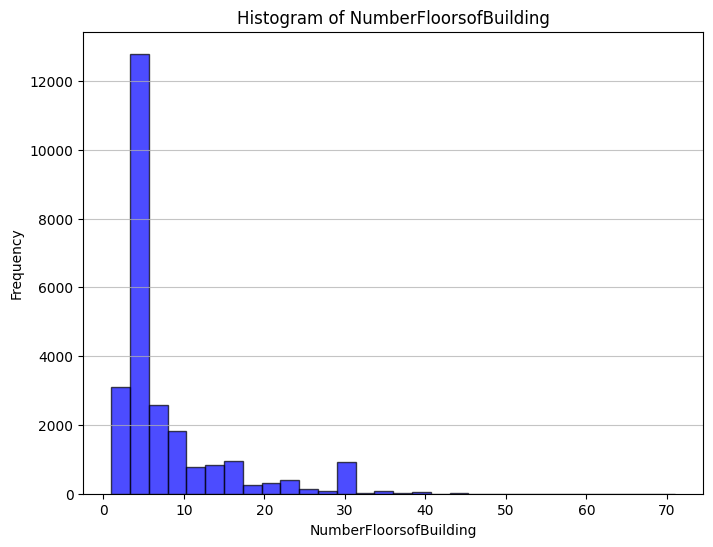

In [13]:
## Create Histogram for each feature

for column in numerical_features.columns:
    plt.figure(figsize=(8,6))
    plt.hist(data[column], bins=30, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [14]:
data['price'].describe()

count           25155
unique           2825
top       1,350,000TL
freq              371
Name: price, dtype: object

In [15]:
data['price'] = data['price'].str.replace("TL", "").str.replace(",", "").str.extract('(\d+\.?\d*)').astype(float)
data['GrossSquareMeters'] = data['GrossSquareMeters'].str.replace(" m2", "").astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\KARAN\AppData\Local\Temp\ipykernel_11352\2304725746.py:1: SyntaxWarning: invalid escape sequence '\d'
  data['price'] = data['price'].str.replace("TL", "").str.replace(",", "").str.extract('(\d+\.?\d*)').astype(float)


In [16]:
## Group by BuildingAge (categorical variables)

grouped = data.groupby("BuildingAge")

In [17]:
summary_stats = grouped["price"].agg(["mean", "median", "min", "max", "std"])
print("Summary statistics for price grouped by Building age:")
print(summary_stats)

Summary statistics for price grouped by Building age:
                     mean     median       min           max           std
BuildingAge                                                               
0 (Yeni)     2.716895e+06  1350000.0   20000.0  2.730000e+08  5.959061e+06
1            3.001356e+06  1372500.0   99999.0  1.100000e+08  5.774246e+06
11-15        7.094360e+06  1345000.0   35000.0  2.000000e+09  5.694029e+07
16-20        5.711826e+06  1100000.0   85000.0  1.250000e+09  4.588972e+07
2            4.596764e+06  1475000.0  285000.0  1.750000e+09  5.648079e+07
20 Ve Üzeri  9.250000e+05   925000.0  925000.0  9.250000e+05           NaN
21 Ve Üzeri  6.688592e+06  1300000.0   22222.0  7.610000e+08  3.794103e+07
3            3.118105e+06  1450000.0  240000.0  2.150000e+08  1.010505e+07
4            3.418548e+06  1390000.0  200000.0  7.390000e+08  1.711159e+07
5-10         7.207567e+06  1400000.0   75000.0  1.600000e+10  2.266947e+08


In [18]:
## Summary statistics for GrossSquareMeters grouped by BuildingAge

square_meter_stats = grouped['GrossSquareMeters'].agg(["mean", "median", "min", "max","std"])
print("\nSummary Statistics for Gross Square Meters Grouped by BuildingAge:")
print(square_meter_stats)


Summary Statistics for Gross Square Meters Grouped by BuildingAge:
                   mean  median    min    max         std
BuildingAge                                              
0 (Yeni)     136.602006   117.0    1.0  900.0   76.126454
1            132.202228   115.0    1.0  964.0   83.619545
11-15        185.431727   135.0    1.0  980.0  144.136871
16-20        171.859845   130.0    1.0  900.0  115.007465
2            134.186162   115.0    1.0  900.0   74.916558
20 Ve Üzeri  127.000000   127.0  127.0  127.0         NaN
21 Ve Üzeri  161.975347   130.0    1.0  990.0  124.138566
3            139.067293   120.0    1.0  851.0   84.371199
4            136.062111   120.0    1.0  760.0   70.623525
5-10         148.980741   124.0    1.0  976.0  100.203823
